In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = pd.read_csv('/Users/yeong-eun/Desktop/영은/쿠글/week03/advertising.csv')
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


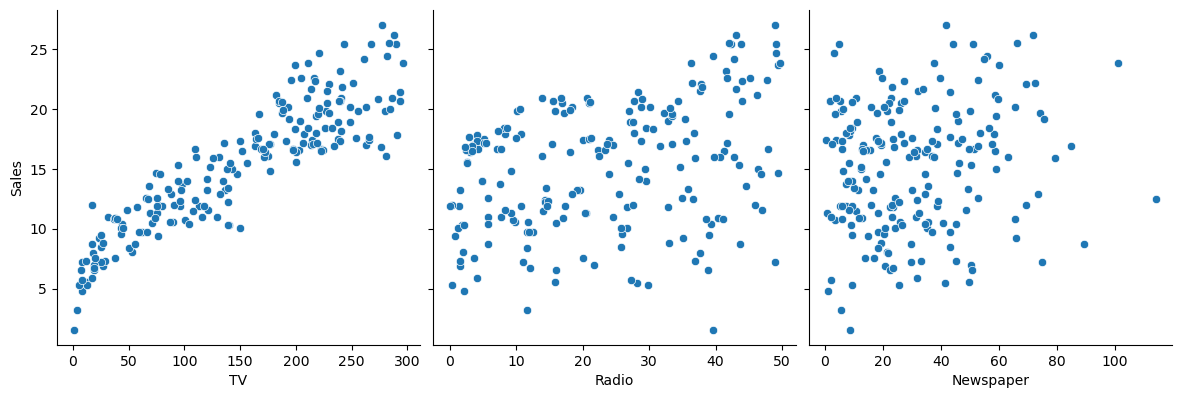

In [3]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars=['Sales'], height=4)   # 컬럼명 넣기

In [6]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [11]:
x_data = np.array(df[['TV','Radio','Newspaper']], dtype=np.float32)   # 컬럼명 넣기
y_data = np.array(df['Sales'], dtype=np.float32)     # 컬럼명 넣기

print(x_data.shape)
print(y_data.shape)

x_data = x_data.reshape((-1, 3))
y_data = y_data.reshape((-1, 1))

print(x_data.shape)
print(y_data.shape)

(200, 3)
(200,)
(200, 3)
(200, 1)


In [12]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=6)

model=LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [13]:
model.score(x_train, y_train) # 훈련세트 점수 확인

0.8994823490588307

In [14]:
model.score(x_data,y_data) # 검증세트 점수 확인

0.9024773627842395

#### <과제1>

#### (1) 빈칸을 채워주세요
#### (2) 훈련 세트의 점수와 검증 세트의 점수는 각각 얼마인지 써주세요
####     답 : 0.8994823490588307, 0.9024773627842395
#### (3) 이 모델이 과대적합인지 과소적합인지, 또는 잘 훈련되었는지 판단하시고 그 이유를 말씀해주세요
####     답 : 잘 훈련되었다. 훈련 세트 점수와 검증 세트 점수 모두 높다.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder , StandardScaler
import numpy as np 
import pandas as pd 

In [17]:
# 데이터셋을 불러옵니다.
data=pd.read_csv("/Users/yeong-eun/Desktop/영은/쿠글/week03/Obesity Classification.csv")
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [19]:
# 범주형 열(Label과 Gender)을 LabelEncoder를 사용해 인코딩합니다.
label_encoder=LabelEncoder()
data['target']=label_encoder.fit_transform(data['Label'])
data['gender']=label_encoder.fit_transform(data['Gender'])
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label,target,gender
0,1,25,Male,175,80,25.3,Normal Weight,0,1
1,2,30,Female,160,60,22.5,Normal Weight,0,0
2,3,35,Male,180,90,27.3,Overweight,2,1
3,4,40,Female,150,50,20.0,Underweight,3,0
4,5,45,Male,190,100,31.2,Obese,1,1


In [20]:
# 'Gender', 'Label', 'ID' 열을 데이터셋에서 제거합니다.
#'Gender'와 'Label'은 인코딩되었고, 'ID'는 모델링에 관련이 없을 가능성이 높음
if "Gender" in data.columns:
    df=data.drop(["Gender","Label","ID"],axis=1)
df.head()

,Age,Height,Weight,BMI,target,gender
0,25,175,80,25.3,0,1
1,30,160,60,22.5,0,0
2,35,180,90,27.3,2,1
3,40,150,50,20.0,3,0
4,45,190,100,31.2,1,1


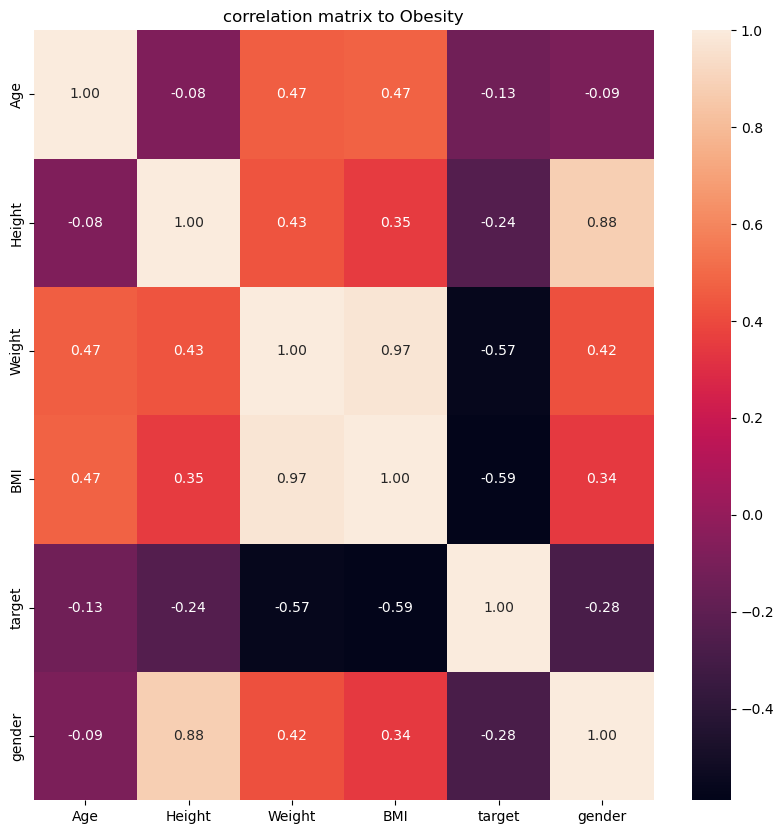

In [33]:
# 데이터셋의 상관관계 행렬을 계산합니다.
corrmatrix=df.corr()

# 상관관계 행렬을 시각화합니다.
plt.figure(figsize=(10,10))
sns.heatmap(corrmatrix,annot=True,fmt="0.2f",color="Red")
plt.title("correlation matrix to Obesity")
plt.show()

In [21]:
# 'target' 열을 제외한 나머지 변수들을 x에 저장합니다.
x=df.drop("target",axis=1)
# 'target' 열을 y에 저장합니다.
y=df['target']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=6)

# Decision Tree 모델을 초기화하고 학습합니다.
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
# 학습 데이터에 대한 모델의 정확도를 확인합니다.
model1.score(x_train,y_train)

1.0

In [24]:
# 테스트 데이터에 대한 모델의 정확도를 확인합니다.
model1.score(x_test,y_test)

0.9545454545454546

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=6)

model2=LogisticRegression()
model2.fit(x_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
model2.score(x_train,y_train)

0.8255813953488372

In [27]:
model2.score(x_test,y_test)

0.7727272727272727

#### 과제2
#### (1) 빈칸을 채워주세요
#### (2) 분류 모델의 과적합을 방지하는 방법에는 뭐가있는지 찾아보세요

1. 교차 검증 (Cross-Validation)
   데이터셋을 여러 부분으로 나누어 모델을 여러 번 훈련하고 테스트

2. 정규화 (Regularization)
   모델의 복잡도를 줄이는 방법으로, L1 (Lasso) 또는 L2 (Ridge) 정규화를 사용

3. 조기 종료 (Early Stopping)
   모델이 학습하는 동안 검증 세트의 성능을 지속적으로 모니터링하고, 성능이 더 이상 개선되지 않으면 훈련을 중단하는 방법